In [3]:
# Loading virtual pyton ENV
!source ./bin/activate

In [42]:
# Importing pyton libs
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# calling DecisionTreeClasiffier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt


In [5]:
#reading data from local

#read1 = pd.read_csv("data_preprocess1.csv")

In [6]:
# 
df = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv")
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [7]:
df.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
df.tail(5)

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [9]:
#checking basic metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [10]:
#accessing particular column

df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [11]:
df[['Age', 'Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [12]:
# using data frame iloc

df.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [13]:
df.iloc[0:5, 0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0


In [14]:
input_features = df.iloc[:,0:3].values

In [15]:
label = df.iloc[:, -1].values

In [16]:
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [17]:
# fixing missing values

df_impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [18]:
#calculating the missing values
df_impute.fit(input_features[:,1:3])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [19]:
input_features[:,1:3] = df_impute.transform(input_features[:,1:3])

In [20]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [21]:
# converting 2 values into 0 and 1s
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [22]:
# data preprocessing using categorical values
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),
                 [0])], remainder = 'passthrough')

In [23]:
input_features = np.array(ct.fit_transform(input_features))
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [24]:
# ready to train machine learning algorithm

training_input, testing_input, training_label, testing_label = train_test_split(input_features, 
                                                 label, test_size = 0.1)

In [28]:
# calling decision tree classifier
classifier = DecisionTreeClassifier()

In [30]:
# training classifier with the above preprocess split data
trained_model = classifier.fit(training_input, training_label)

In [31]:
# make predictions
predicted_values = trained_model.predict(testing_input)


In [32]:
print(predicted_values)

[1 0 0]


In [34]:
print(testing_label)

[0 0 0]


In [38]:
accuracy_score(testing_label, predicted_values)

0.6666666666666666

In [39]:
ashu_new_data = np.array([['Spain', '39', '51000']])

In [45]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)

In [44]:
le.classes_

array(['No', 'Yes'], dtype=object)

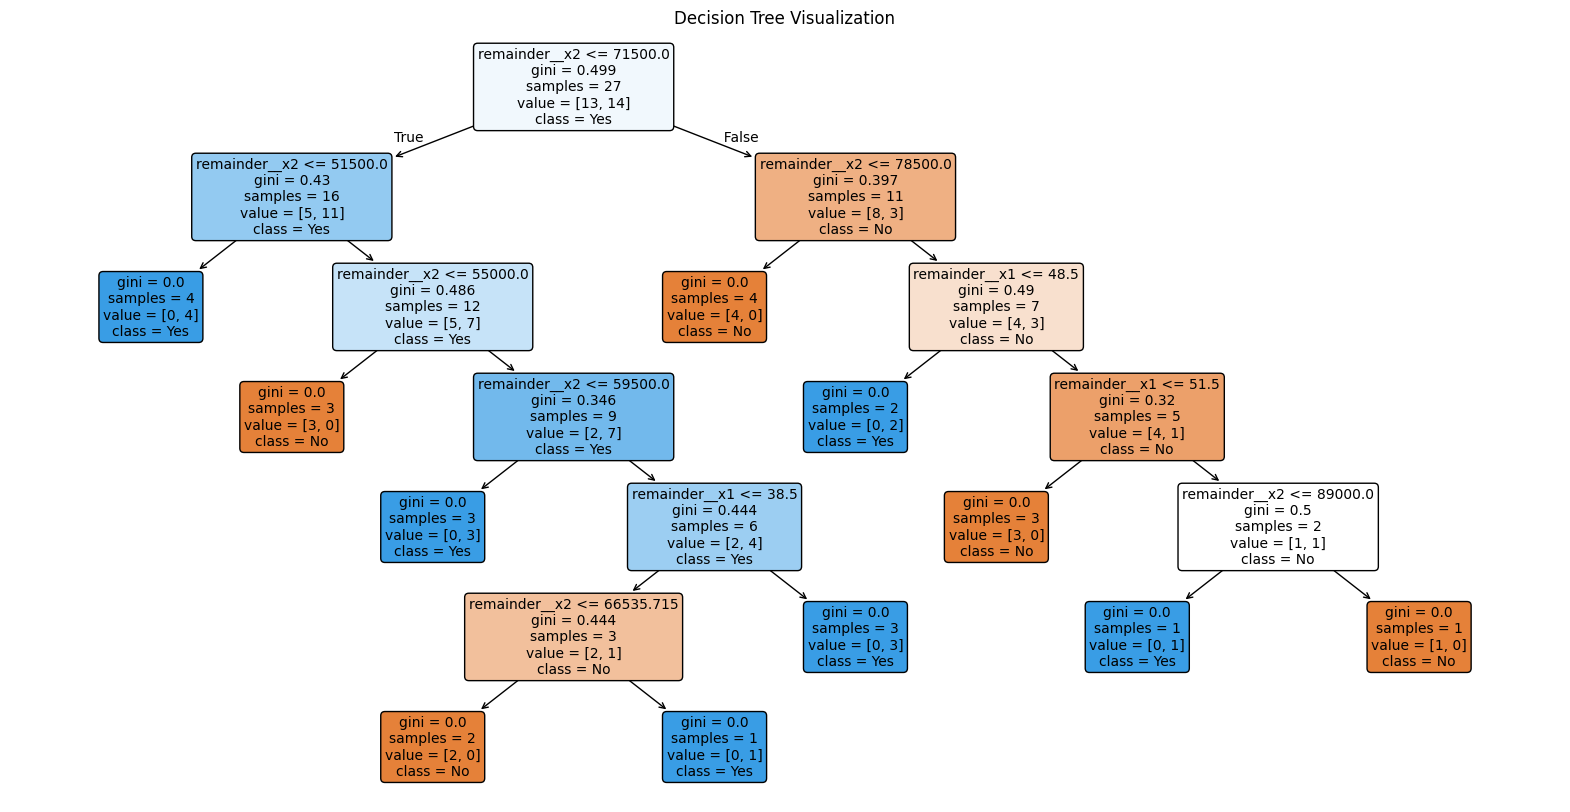

In [47]:
plt.figure(figsize = (20,10))
plot_tree(classifier,
         feature_names = ct.get_feature_names_out(),
         class_names = le.classes_,
         filled = True,
         fontsize = 10,
         rounded = True)

plt.title("Decision Tree Visualization")
plt.show()